<a href="https://colab.research.google.com/github/marojavil/RiesgoCDH/blob/main/MIA_TFM2_MARA_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo de Fin de Modulo 2 MIA

### **Realizado por**: Mauricio Alberto Rojas Avile

### En este proyecto se utilizará el cojunto de datos de acceso público de enfermedades cardíacas "Framingham", que incluye más de 4000 registros, en 16 columnas 15 atributos, siendo a variable objetivo el riesgo a los 10 años de sufrir una enfermedad cardiovascular CDH. Se tratara de construir un predictor que permita clasificar a los pacientes según el riesgo de enfermedad.
### **Los 15 atributos son**:
### male
### age
### education
### currentSmoker
### cigsPerDay
### BPMeds
### prevalentStroke
### prervalentHyp
### diabetes
### totChol
### sysBP
### diaBP
### BMI
### heartRate
### glucose
### TenYearCHD

## 1. Exploración del conjunto de datos utilizando métodos de librería pandas para cargar, filtrar y listar tabla de datos.

### Cargamos la librería pandas.

In [ ]:
# importamos pandas
import pandas as pd

### Ahora cargamos el archivo desde la unidad local.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


### Cargamos el conjunto de datos

In [ ]:
df = pd.read_csv('heart_disease.csv')

### Exploración inicial de los datos.

In [ ]:
# Visulización completa de datos
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [ ]:
# Visualizar las primeras filas del conjunto de datos
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [ ]:
# Información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [ ]:
# Estadísticas descriptivas
print(df.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

In [ ]:
# Indicar valores numéricos
print(df.select_dtypes(include=['number']).columns)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
# Indicar valores categóricas
print(df.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
# Contar número de clases en la variable objetivo
print(df["TenYearCHD"].value_counts())

TenYearCHD
0    3594
1     644
Name: count, dtype: int64


In [ ]:
# Filtramos registros del riesgo a 10 años de padecer enfermedad cardivascular CHD (suponiendo que 1 indica riesgo)
alto_riesgo = df[df["TenYearCHD"] == 1]
print(alto_riesgo)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
3        0   61        3.0              1        30.0     0.0   
6        0   63        1.0              0         0.0     0.0   
15       0   38        2.0              1        20.0     0.0   
17       0   46        2.0              1        20.0     0.0   
25       1   47        4.0              1        20.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4221     1   50        1.0              0         0.0     0.0   
4223     1   56        4.0              0         0.0     1.0   
4226     1   58        1.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3                   0             1         0    225.0  150.0   95.0  28.58   
6                   0             0         0    205.0  138.0

In [ ]:
  # Listamos columnas específicas
print(df[["age", "BMI", "TenYearCHD"]]) # Seleccionar solo las columnas "age", "BMI" y "TenYearCHD"

      age    BMI  TenYearCHD
0      39  26.97           0
1      46  28.73           0
2      48  25.34           0
3      61  28.58           1
4      46  23.10           0
...   ...    ...         ...
4233   50  25.97           1
4234   51  19.71           0
4235   48  22.00           0
4236   44  19.16           0
4237   52  21.47           0

[4238 rows x 3 columns]


### **Conclusión**:
### La exploración de datos es el paso inicial del análisis de datos, utiliza técnicas para describir caracterizaciones de conjunto de datos.
### Este proyecto se trata de un estudio que consta de 16 atributos o varibles,con 4238 observaciones o registros, que pudimos visualizar mediante el dataframne tanto general como de las primeras cinco filas con uso de la función print() y head(), respectivamente.
### Además fue posible listar con la función info() el mobre de los atributos, el conteo de los registro no nulos y el tipo de datos. Usamos también la función describe() para estadísticas descriptivas como la media, desviación estadar, valor minimo, valor maximo y cuartiles.
### Mediante el uso de la función select_dtypes() listamos los valores numericos y los valores categoricos, resultando que todos los atributos son de valores númericos. También listamnos los valores nulos con la función isnull().sum() estando presente valores nulos en las variables education, cigsPerDay, BPMeds, totChol, BMI y glucose.
### Con la función value_counts() podemos listar el numero de clases de la variable objetivo tomando en cuanta que el valor 1 supone que si hay riesgo de a los 10 años de padecer enfermedad cardiovacular CHD, regitrando 3594 registros sin riesgo y 644 con riesgo.


## 2. Exploración visual de los datos más relevantes, utilizando alguna de las librerías de python.

In [ ]:
# Cargamos las librerías necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

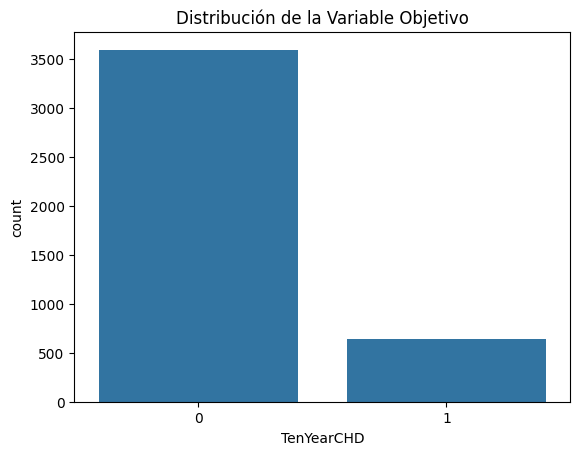

In [ ]:
#visualizamos la distribución de la variable objetivo
sns.countplot(x="TenYearCHD", data=df)
plt.title("Distribución de la Variable Objetivo")
plt.show()

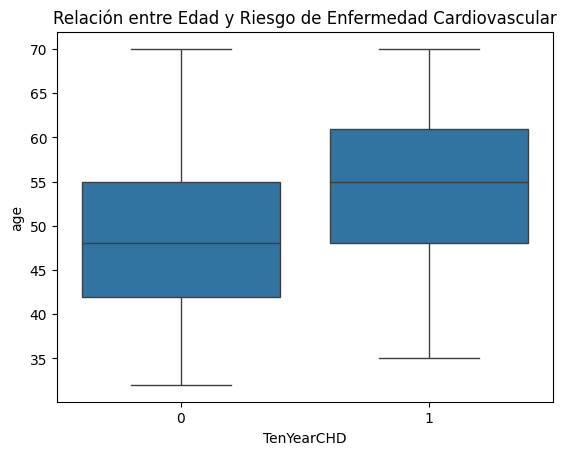

In [ ]:
# Visualización de relación entre una variable y la variable objetivo
sns.boxplot(x="TenYearCHD", y="age", data=df)
plt.title("Relación entre Edad y Riesgo de Enfermedad Cardiovascular")
plt.show()

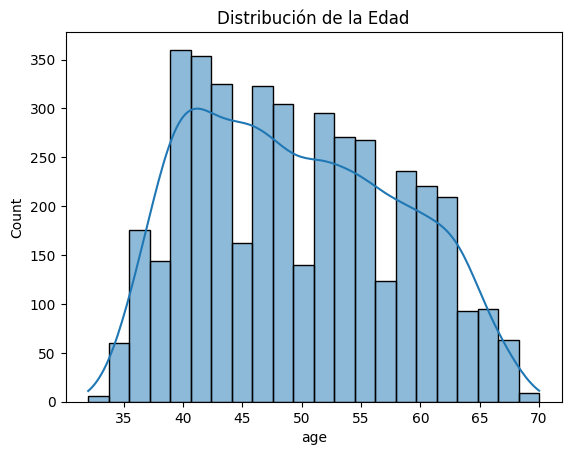

In [ ]:
# Visualización de la distribución de una variable númerica age
sns.histplot(data=df, x="age", kde=True)
plt.title("Distribución de la Edad")
plt.show()

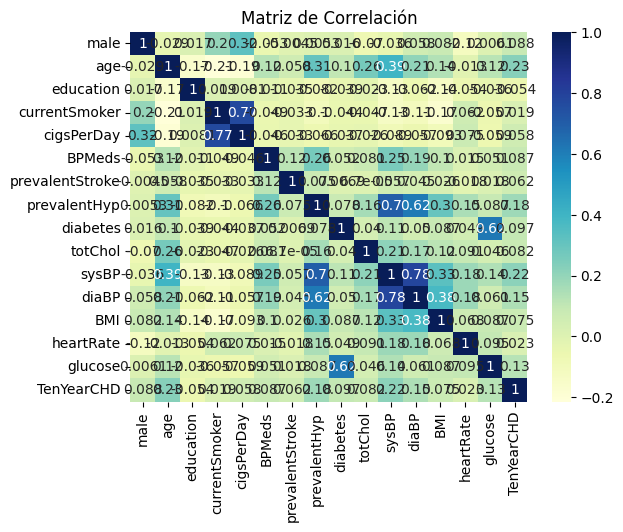

In [ ]:
# Se visualiza la matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Matriz de Correlación")
plt.show()

### **Conclusión**:
### Visualizamos un histograma con la función sns.countplot(), para representar la distribución de la variable objetivo, podemos observar que en proporción es mayor la cantidad de pacientes que no presentan riesgo a los 10 años de padecer CHD en comparación con los que si presentan riesgo.
### Relación de una variable con la variable obejetivo, utilizamos la función sns.boxplot() para graficar en boxplot las dos variables relacionadas edad y riesgo a los 10 años de padecer CHD. En el grupo de los que no presentan riesgo la mediana de la edad se ubica entres los 45 y 50 años, y por otro lado los que si presentan riesgo la mediana de la edad se ubica entre los 55 y 60 años.
### Ditribución de una variable númerica, usando la función sns.histoplo() podemos observar que los rangos de las edades más predominantes en el estudio esta comprendido entre 40 y 44 años y al contrario las edades menos predominates son las de 20 y 70 años.
### Visualizamos la matríz de correlación utilizando la función sns.heatmap() e incluyendo la funcion corr(), notamos la relacion que existe entre todas las variables. En la grafica los cuadros más azules y con los valores que más se acercan a 1 son los que tienen más relación positiva, y los cuadros que mas tienden al amarillo y con valores cercanos al -0.2, tienen mas relación negativa. Los cuadros donde interceptan los dos colores que tienden a mas claros y los valores se acercan a 0 hay menos relación entre las variables.

## 3. Ejecución de métodos de imputación y normalización de datos explicando brevemente tus decisiones

### **Iputación de datos**

In [ ]:
# Descargamos Sklearn.Impute
from sklearn.impute import SimpleImputer

# Imputamos valores númericos con la mediana
imputer = SimpleImputer(strategy="median")
df[["education", "cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]] = imputer.fit_transform(df[["education", "cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]])

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### **Normalización de datos**

In [ ]:
# Descargamos Sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Normalizamos las variables numericas entre 0-1
scaler = MinMaxScaler()
df[["education", "cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]] = scaler.fit_transform(df[["education", "cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]])

In [ ]:
# Visualización del DataFrame despues de los cambios
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39   1.000000              0    0.000000     0.0   
1        0   46   0.333333              0    0.000000     0.0   
2        1   48   0.000000              1    0.285714     0.0   
3        0   61   0.666667              1    0.428571     0.0   
4        0   46   0.666667              1    0.328571     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50   0.000000              1    0.014286     0.0   
4234     1   51   0.666667              1    0.614286     0.0   
4235     0   48   0.333333              1    0.285714     0.0   
4236     0   44   0.000000              1    0.214286     0.0   
4237     0   52   0.333333              0    0.000000     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol  sysBP  diaBP  \
0                   0             0         0  0.149406  106.0   70.0   
1                   0             0         0  0.242784  121.0   81.0   


In [ ]:
# Visualización de la información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


### **Conclusión**:
### En el aprendizaje automático o machine learning ML, siempre es necesario el procesamiento de datos y con los misma, imputación y normalización de valores. Mas cuando se trabaja con datos reales que pueden contener valores faltantes y con diferentes escalas de medición.
### **.- Imputación de datos**, es el proceso de reemplazar valores faltantes en un conjunto de datos. En ML no se pueden manejar valores nulos y, por lo tanto,se necesita una estrategia para gestionar estos datos. Ignorar los registros con valores faltantes puede llevar a una perdida de información valiosa.

### ***Métodos comunes de imputación***
### - Media/mediana/moda: se usa en variabes numéricas, se puede reemplazar los valores faltantes con la media o mediana. Para variables categóricas se puede usar la moda.
### - KNN Imputación: utiliza los K vecinos más cercanos para estimar el valor. utiliza la distacia euclideana para los mismo.
### - Imputación de regresión: se basa en la relación entre otras variables para predecir el valor faltante.

### **.- Normalización de datos**, también llamada escalado de datos, es esencial para poner todas las carácteristicas en la mísma escala. Esto es espcialmente importante en algoritmos que utilizan distacias como KNN o SVM y en redes neuronales, ya que las características con escalas diferentes pueden afectar el rendimiento del modelo.

### Métodos comunes de normalización
### - Min-Max Scaling: escala los datos entre un rango de 0 a 1.
### - Z-Score Normalization: transforma los datos para que tengan media 0 y desviacion standar 1.

## 4. Análisis básico de selección de característcas siguiendo alguna de las técnicas vistas a lo largo del módulo que te permita obtener una submuestra depurada del dataset original.

### Primeramente se hace una preparación de datos, que incluye normalizar los datos y separar la variable objetivo.

In [ ]:
# Descargamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separamos la variable objetivo del resto del dataset
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

# Normalizamos las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Seguidamente aplicamos PCA.

In [ ]:
# Descargamos librerías necesarias
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicamos PCA
pca = PCA(n_components=0.95)#Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Ver cuantos componentes se han utilizado
print(f"Numero de companentes principales seleccionados: {pca.n_components_}")

Numero de companentes principales seleccionados: 13


### Creamos un nuevo DataFame con las componentes principales

In [ ]:
# Creamos el Dataframe con las compenentes principales y agregamos la variable objetivo
pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# A este dataframe agregamos la variable objetivo
pca_df["TenYearCHD"] = y.reset_index(drop=True)

# Mostramos el Dataframe
print(pca_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.811681 -1.008386  0.036070 -0.640776  0.120618  2.115917  0.389179   
1    -0.016246 -1.245299 -0.215509  1.425223 -0.313820  0.384748 -0.728297   
2    -1.000993  1.437215 -0.112887 -0.444436 -0.605103 -0.928525 -0.308852   
3     1.420531  1.668055  0.163327 -0.217314  0.327935  0.166292  0.988708   
4    -0.824083  1.049463  0.142917  1.722260  0.707562 -0.141284  0.916835   
...        ...       ...       ...       ...       ...       ...       ...   
4233  2.185718  1.205497 -0.413420 -0.608165 -0.674335 -0.913005  0.790689   
4234 -2.131404  2.359184 -0.110141 -0.834687  0.541381 -0.133816  1.128295   
4235 -1.259865  0.653609  0.359491  1.434991  0.529362 -0.674015  0.007064   
4236 -1.157525  0.663038 -0.010764  1.430072  0.396725 -0.339339 -1.128678   
4237  0.154813 -1.512101  0.618652  1.035185  0.220163 -0.403795  0.404451   

           PC8       PC9      PC10      PC11      PC12      PC1

### Visualizamos la varianza explicada.

Text(0, 0.5, 'Varianza explicada')

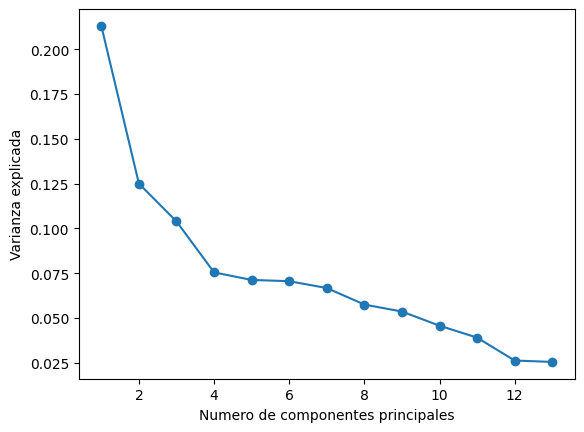

In [ ]:
# Vizualizamos la varianza explicada
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker="o")
plt.xlabel("Numero de componentes principales")
plt.ylabel("Varianza explicada")

### **Conclusión**:
### La selección de características es un paso fundamental en el preprocesamiento de datos antes de construir modelos de aprendizaje automático. La idea es reducir la dimensionalidad de los datos manteniendo la mayor cantidad de información relevante posible. Esto puede ayudar a mejorar el rendimiento del modelo y reducir el tiempo de entrenamiento, especialmente cuando se trabaja con conjuntos de datos grandes o complejos.

### Existen tres técnicas comunes para la reducción de dimensionalidad:

### PCA (Análisis de Componentes Principales)
### ICA (Análisis de Componentes Independientes)
### LDA (Análisis Discriminante Lineal)

### En este estudio utilizamos el PCA, debido a que es una técnica de reducción de dimensionalidad no supervisada. Busca nuevas variables (componentes principales) que sean combinaciones lineales de las características originales, de manera que maximicen la varianza de los datos en las primeras componentes. Es útil cuando tenemos muchas características correlacionadas y queremos reducir la redundancia.

### Mostramos la varianza explicada por cada componente. Esto nos indica qué porcentaje de la variabilidad de los datos es capturado por cada componente principal.

## 5. Partierdo de esta submuestra final, generar los grupos de entrenamiento y validación  e imprime pos pantalla alguna característica del mismo.

In [ ]:
# Se descargan la librerías
from sklearn.model_selection import train_test_split

# Se separan los datos en características (X) y Variable objetivo (y)
X = pca_df.drop("TenYearCHD", axis=1)
y = pca_df["TenYearCHD"]

# Se dividen los datos en conjuntos de entrenamiento y validación (80-20%) respectivamente
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #stratify=y asegura que la proporcion de clases de la variable objetivo se mantenga en ambos conjuntos

# Se imprimen algunas características de los conjuntos
print("tamaño del conjunto de entrenamiento:", X_train.shape)
print("tamaño del conjunto de validacion:", X_val.shape)
print("Distribucion de la variable objetivo en el conjunto de entrenamiento:")
print(y_train.value_counts())
print("Distribucion de la variable objetivo en el conjunto de validacion:")
print(y_val.value_counts())



tamaño del conjunto de entrenamiento: (3390, 13)
tamaño del conjunto de validacion: (848, 13)
Distribucion de la variable objetivo en el conjunto de entrenamiento:
TenYearCHD
0    2875
1     515
Name: count, dtype: int64
Distribucion de la variable objetivo en el conjunto de validacion:
TenYearCHD
0    719
1    129
Name: count, dtype: int64


### **Conclusión**:
### Este procedimiento nos permite entrenar el modelo en un subconjunto de los datos (entrenamiento) y evaluar su rendimiento en un conjunto de datos independiente (validación).
### El proceso de partición en conjuntos de entrenamiento y validación es crucial para evitar el sobreajuste, y para asegurar que nuestro modelo sea capaz de generalizar bien en datos no vistos. usamos la función train_test_split(). Generalmente, se utiliza la proporción del 70-80% para entrenamiento y el resto para validación. En este estudio se representa con un tamaño conjunto de enretnamiento de 3390 y un tamaño de conjunto de validación de 848.

## 6. Isntancia el modelo Scikit-learn de tu elección y aplicalo sobre los datos seleccionados para el entrenamiento

### Para instaciar un modelo de Scikit-learn y aplicarlo sobre los datos seleccionados para el entrenamiento, elegimos el Modelo de Random Forest.

In [ ]:
# se instala Sciki_learn
!pip install scikit-learn

# Se isntalan las lirerias necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Instaciamos el modelo de regresión logística
rf_model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo
rf_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de validación
y_pred_rf = rf_model.predict(X_val)  # Suponiendo que X_val es tu conjunto de validación

# Evaluamos el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_rf))

print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred_rf))

Matriz de confusión:
[[704  15]
 [123   6]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       719
           1       0.29      0.05      0.08       129

    accuracy                           0.84       848
   macro avg       0.57      0.51      0.50       848
weighted avg       0.77      0.84      0.78       848



### **Conclusión**:
### El Random Forest es un modelo de aprendizaje supervisado basado en árboles de decisión, y se puede utilizar tanto para problemas de clasificación como de regresión.

### El reporte de resultados, contiene:

### .-Precisión: La proporción de predicciones correctas.
### .-Recall: La capacidad del modelo para identificar correctamente las instancias positivas.
### .-F1-Score: La media armónica de la precisión y recall, útil cuando las clases están desbalanceadas

### El propósito de aplicar un modelo de entrenamiento en el aprendizaje automático es aprender patrones en los datos para hacer predicciones o tomar decisiones basadas en datos nuevos, no vistos durante el entrenamiento. En sí, la idea es que el modelo generalice bien a datos nuevos, permitiéndole hacer predicciones precisas en situaciones del mundo real.

## 7. Calcula y muestra por pantalla información de las métricas sobre el desempeño del modelo frente al conjunto de validación.

### Para calcular y mostrar las metricas de desempeño del modelo sobre el conjunto de validación, utilizaremos las métricas estándar como la precisión. el recall, el F1-score y la exactitud.

In [ ]:
# Descargamos las librerías
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculamos las métricas
precision = precision_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)
accuracy = accuracy_score(y_val, y_pred_rf)

# Mostramos las métricas
print("Métricas del modelo:")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Exactitud: {accuracy:.2f}")

Métricas del modelo:
Precisión: 0.29
Recall: 0.05
F1-score: 0.08
Exactitud: 0.84


### **Conclusión**:
### El cálculo de métricas de desempeño de modelos es una parte crucial del proceso de desarrollo y evaluación de modelos de aprendizaje automático (ML), ya que nos permite medir y entender cómo de bien está funcionando el modelo en el conjunto de datos, y cómo se comportará con datos no vistos.
### El valor considerado "bueno" depende del contexto de tu aplicación y del equilibrio que se busque entre las diferentes métricas. En para este caso usamos:

### .-Exactitud, es útil cuando las clases están equilibradas, pero no es tan útil en datasets desbalanceados.
### .-Precisión, es importante cuando se necesita evitar falsos positivos, es decir, no clasificar erróneamente instancias negativas como positivas.
### .-Recall, es crucial cuando se necesita evitar falsos negativos, como en problemas donde no se puede permitir perder instancias positivas (por ejemplo, diagnóstico médico).
### .-F1-score.- es útil cuando se busca un balance entre precisión y recall, y especialmente cuando las clases están desbalanceadas.

### En todos los casos cuando los valore se acrcan a 1 se consideran buenos y si por otro lado se aacercan a 0  no seran tan buenos. Para efectos de este estudio podria decirse que la metrica de exactitud con un valor 0.84 nos denota que el modelo usado es de buen rendimento.

## 8. Enlace para acceder al cuaderno de trabajo, haz cilp el link:
## https://colab.research.google.com/drive/1qVxWAMoAPPaEdjK9dGOHxKOgD7dmcXiV?usp=sharing   